In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100
gamma = 0.1

Preparing for a Measured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.143 Seconds
Building LP ...
	Done. Took 0.127 Seconds
Building M ...
	Done. Took 0.194 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 500 iterations
	Done. Took 1.078 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): -0.546*(0.621)^t + 0.481*(0.571)^t + 0.169*(-0.026)^t + 0.066*(-0.535)^t + -2.166*(-0.025)^t + 1.201*(-0.025)^t + 0.794365 * delta(t,0)
		RMSE = 0.009
		Matlab: [-0.55  0.62  0.48  0.57  0.17 -0.03  0.07 -0.54 -2.17 -0.03  1.2  -0.03]
	Done. Took 96.228 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): 1.849*(0.687)^t + -1.886*(-0.157)^t + -2.768*(-0.162)^t + -0.084*(-0.225)^t + -2.401*(0.608)^t + 2.328*(-0.245)^t + 2.962938 * delta(t,0)
		RMSE = 0.004
		Matlab: [ 1.85  0.69 -1.89 -0.16 -2.77 -0.16 -0.08 -0.23 -2.4   0.61  2.33 -0.25]
	Done. Took 97.408 Seconds
Learning

{0: {1: array([-0.55,  0.62,  0.48,  0.57,  0.17, -0.03,  0.07, -0.54, -2.17, -0.03,  1.2 , -0.03]),
  2: array([ 1.85,  0.69, -1.89, -0.16, -2.77, -0.16, -0.08, -0.23, -2.4 ,  0.61,  2.33, -0.25])},
 1: {0: array([ 0.05,  0.02,  0.93, -0.06,  2.15,  0.03, -3.64, -0.02, -2.53,  0.03, -1.48,  0.04]),
  2: array([ -0.59,  -0.12,   9.34,   0.01,   2.74,  -0.07, -10.59,   0.04,  -6.2 ,  -0.04,   2.05,   0.1 ])},
 2: {0: array([ -4.94,   0.28,  14.82,   0.11,  -7.33,   0.05,   0.97,   0.58,  -4.72,   0.04,  -0.11,   0.95]),
  1: array([ -2.14,  -0.09,   9.5 ,   0.58,  13.02,   0.89, -19.9 ,   0.81,   2.27,   0.63,  -7.32,   0.36])}}

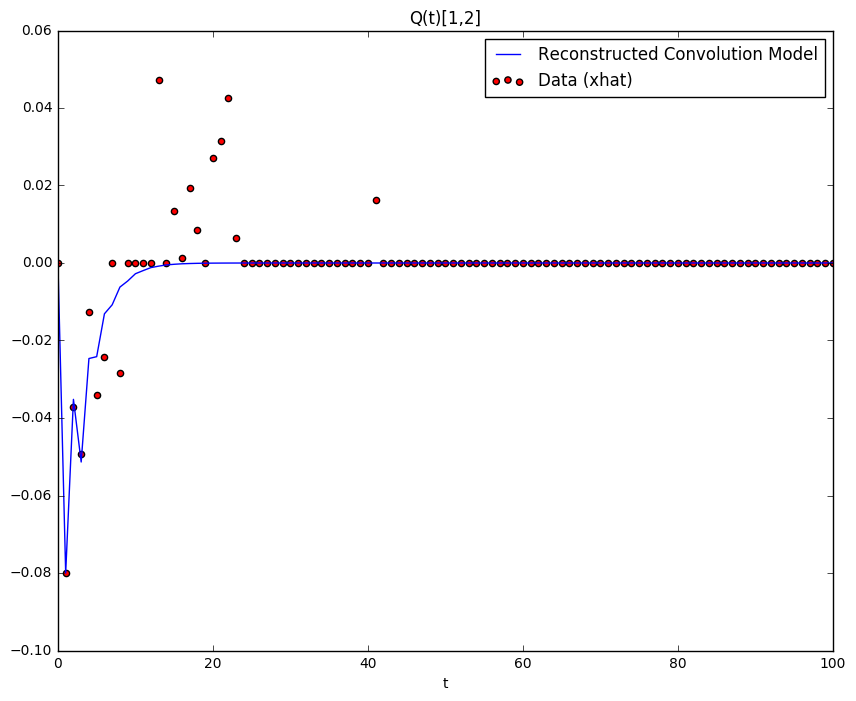

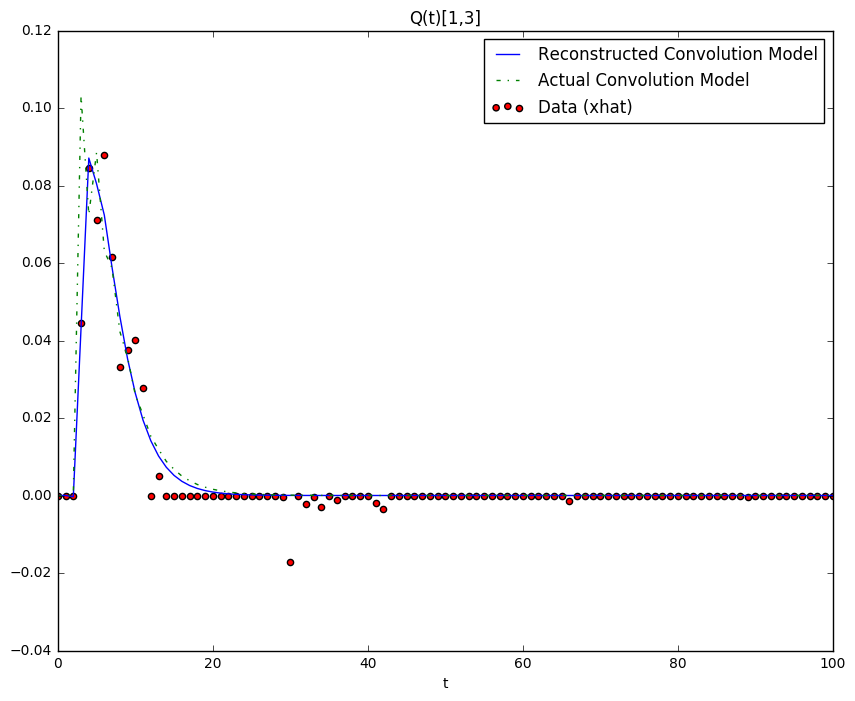

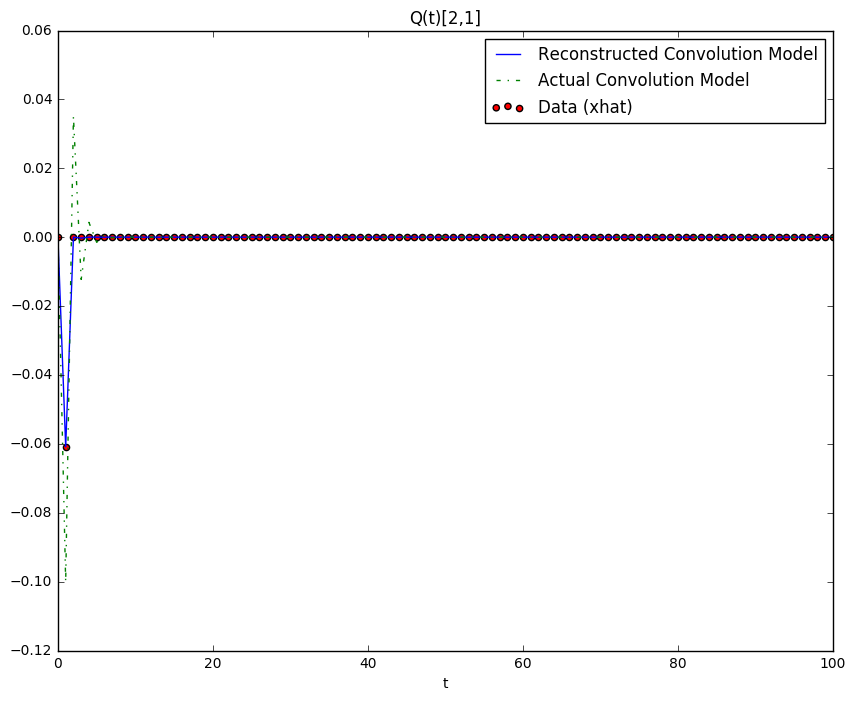

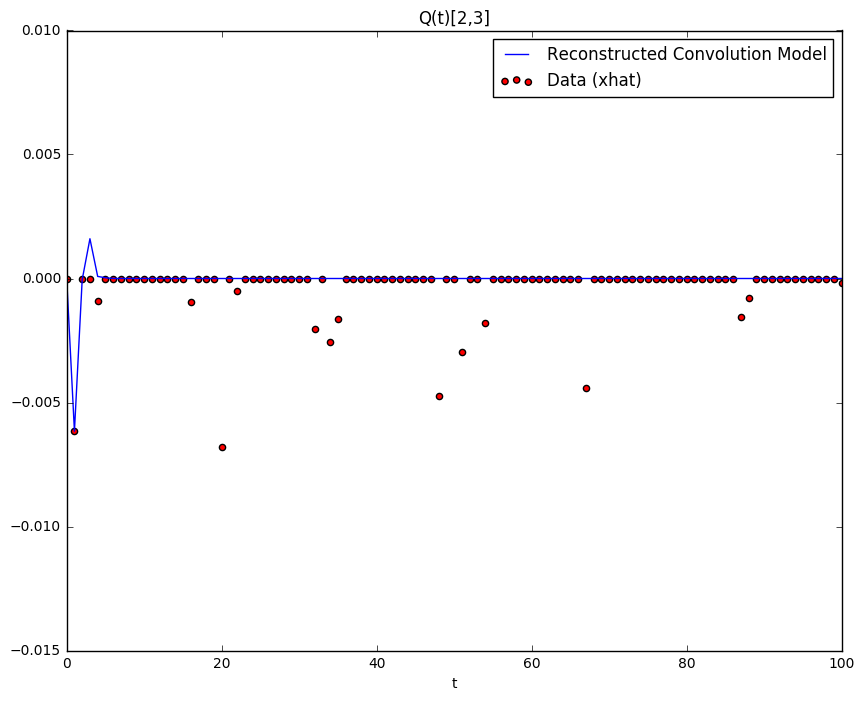

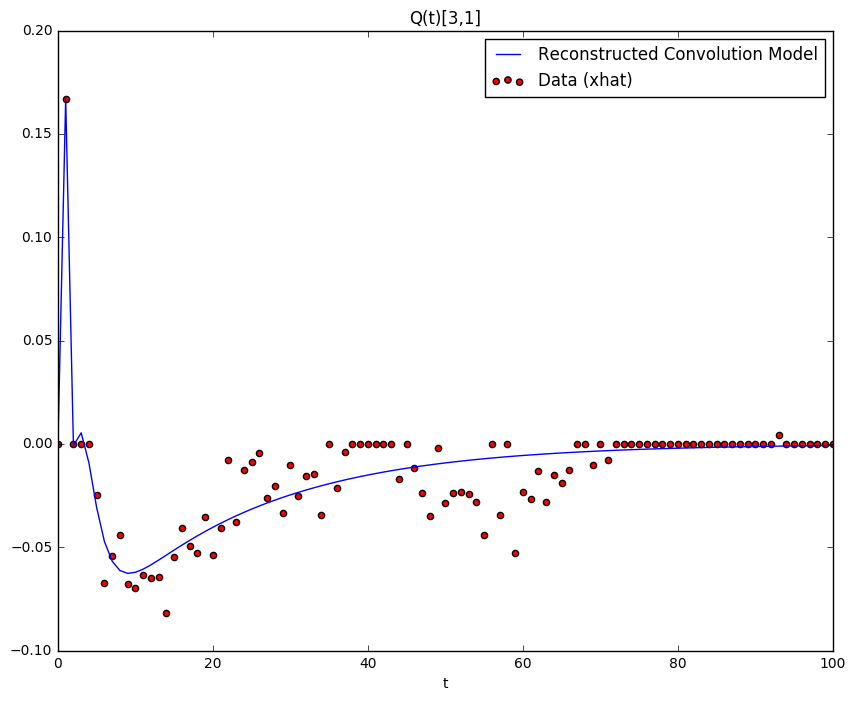

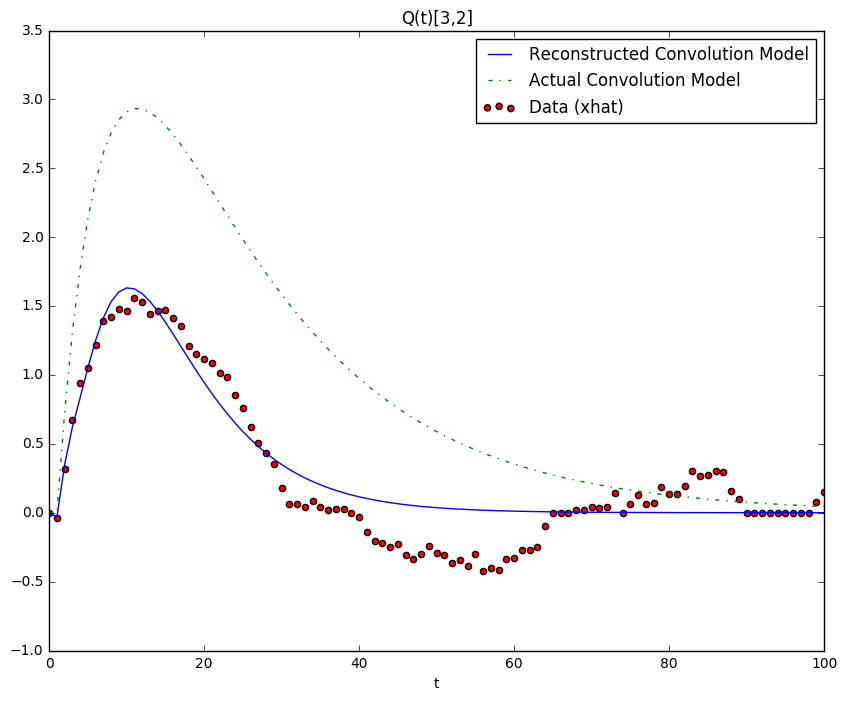

In [2]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=20, order=6, real_params=real_params, robust=True)
recon.measured(y + np.random.randn(u.shape[0], u.shape[1]) * gamma, u, plot=True)  #, ij=(1,3))